<a href="https://colab.research.google.com/github/TinaTing08/Machine-Learning/blob/main/ABTesting_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AB testing**

Generate 100000 dice rolling results

In [ ]:
import numpy as np 
random_data = np.random.randint(1, 7, 100000)
print(random_data.mean()) 
print(random_data.std()) 

3.4984
1.709835500859659


In [ ]:
print(random_data[0:100])

[1 3 5 5 3 2 2 2 1 3 1 1 1 2 5 6 4 1 5 2 5 6 4 2 1 1 2 1 5 1 5 5 5 3 3 2 2
 4 5 2 1 1 2 3 3 6 4 2 6 3 2 6 2 5 6 1 1 3 3 2 4 5 2 4 4 5 5 1 4 5 1 2 6 4
 1 3 3 5 6 4 1 2 4 1 4 1 4 2 3 1 5 4 1 6 4 3 5 1 1 1]


In [ ]:
sample1 = []
for i in range(0, 10):
    sample1.append(random_data[int(np.random.random() * len(random_data))])

print(sample1)

[3, 3, 2, 5, 1, 5, 2, 2, 5, 3]


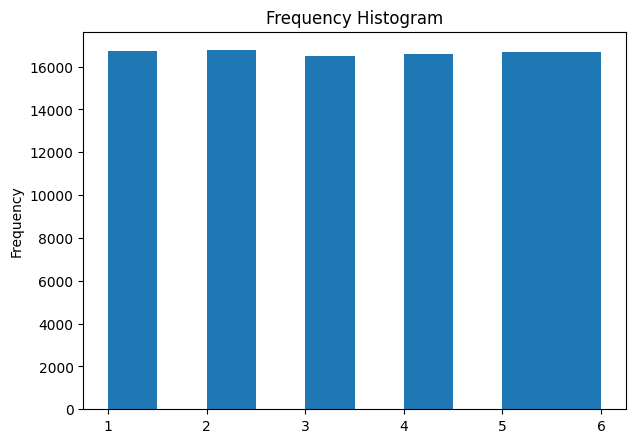

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.hist(random_data)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


In [ ]:
np.mean(sample1)

3.1

In [ ]:
np.std(sample1)

1.374772708486752

CLT Central Limit Theorem 

In [ ]:
samples = []
samples_mean = []
samples_std = []

for i in range(0, 1000):
    sample = []
    for j in range(0, 50):
        sample.append(random_data[int(np.random.random() * len(random_data))])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)

samples_mean_np = np.array(samples_mean)
samples_std_np = np.array(samples_std)

print(samples_mean_np)

[4.   3.92 3.44 3.64 3.58 3.5  3.5  3.6  3.64 3.5  3.72 3.68 3.06 3.08
 3.2  3.2  3.96 3.64 3.36 3.68 3.4  3.68 3.48 3.72 3.54 3.38 3.1  3.48
 3.7  3.62 3.4  3.3  3.52 3.78 3.14 3.74 3.82 3.58 3.36 3.62 3.18 3.52
 3.   3.46 3.34 3.84 3.22 3.5  3.68 3.2  3.36 3.3  3.3  3.3  3.44 3.68
 4.28 3.64 2.9  3.26 3.14 3.64 3.36 3.26 3.52 3.88 3.5  3.46 3.54 3.2
 3.28 3.24 3.6  3.52 3.82 3.26 3.84 3.68 3.68 3.04 3.58 3.5  3.26 3.32
 3.74 3.2  3.4  3.58 3.26 3.7  3.48 3.38 3.7  3.66 3.24 3.44 3.36 3.08
 3.26 3.8  3.7  3.78 3.72 3.5  3.12 3.36 3.5  3.54 3.52 3.52 3.62 3.36
 3.54 3.   3.32 3.34 3.44 3.5  3.6  3.68 3.46 3.52 3.82 3.24 3.56 3.6
 3.7  3.76 2.86 3.2  3.42 3.62 3.52 3.48 3.62 3.5  3.36 3.9  3.64 3.5
 3.42 4.2  3.14 3.48 3.14 3.2  3.46 3.46 3.62 3.58 3.56 3.62 3.56 3.38
 3.34 3.4  3.42 3.38 3.42 3.9  3.4  3.82 3.44 3.3  3.48 3.62 3.66 3.54
 3.32 3.46 3.22 3.7  3.8  3.58 3.68 3.66 3.58 2.96 3.54 3.6  3.5  3.76
 3.6  3.6  3.36 3.38 3.6  3.22 3.9  3.42 3.54 3.4  3.66 3.54 3.52 3.46
 3.26 3.2

In [ ]:
samples_mean_mean = samples_mean_np.mean()
print(samples_mean_mean)
samples_mean_std = samples_mean_np.std()
print(samples_mean_std)

3.49382
0.23862063531890948


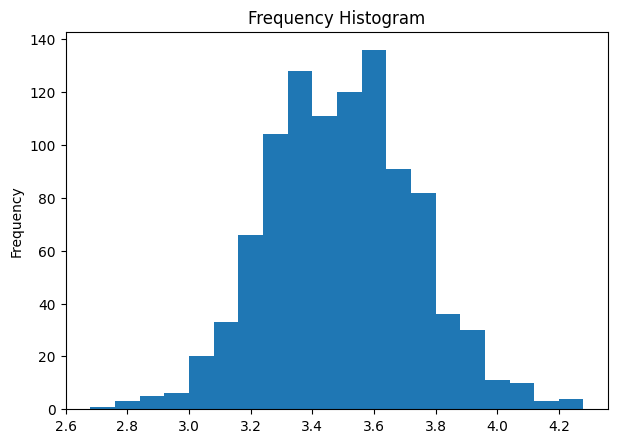

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
#x = np.random.normal(size = 1000)
plt.hist(samples_mean_np, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


AB Testing examples

In [ ]:
from scipy.stats import norm 
#norm.cdf(-24)
norm.cdf(-0.632)

0.2636934386118963

In [ ]:
from scipy.stats import norm 
norm.cdf(-2)

0.022750131948179195

In [ ]:
from scipy.stats import t
alpha = 0.05
t_stat = 2
df = 200
p = (1-t.cdf(abs(t_stat),df))*2
print("p value:", p)

p value: 0.04685318618707113


In [ ]:

norm.cdf(-1.18)


0.11900010745520073

In [ ]:
norm.cdf(-3.6)


0.00015910859015753364

In [ ]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
  
# 随机产生 50 个session length having mean 101

mean_Session_length = 102
sd_Session_length = 15/math.sqrt(50)
alpha =0.05

Nathan_Default_mean =100
data = sd_Session_length*randn(50)+mean_Session_length
print(data)

# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. 
  
ztest_Score, p_value= ztest(data,value = Nathan_Default_mean, alternative='larger')

print("ztest_Score =", ztest_Score)
print("p_value =", p_value)
alpha = 0.05
if p_value > alpha:
	print('Cant reject null hypothesis - Lets assume they are the same.')
else:
	print('Reject the null hypothesis that the means are equal.  - They are different')

[102.38635811 103.96649277 102.08262639 104.4284729  103.15496902
 101.70138459 105.73290321  99.73991807 101.43254552 100.82467881
 103.41232391 104.10441247  98.92719658 103.14813372  99.89849649
 103.22538898 100.7940078  101.97667153 102.88998655  98.61033662
 101.19016059  98.44344723 101.69657658  99.36981894  98.68990031
 104.51426943  99.11749504 105.63996469 101.76342416 104.0365091
  95.95677882 102.65233555 101.26488484 103.45259202 105.09349501
  99.12513611 107.24192731 102.07539559 101.37362028  98.91608495
 107.23300761 102.23949811 101.6694349  103.16872082  98.0104404
 100.93268675 102.97740858 101.90458984 102.50552891 105.88181833]
mean=102.01 stdv=2.41
ztest_Score = 5.853082458664292
p_value = 2.4127236236675368e-09
Reject the null hypothesis that the means are equal.  - They are different


In [ ]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
mean_Session_length = 101
sd_Session_length = 15/math.sqrt(50)

data = sd_Session_length*randn(50)+mean_Session_length
print(data)
alpha = 0.05

Nathan_Default_mean =100
# one sample t-test
# null hypothesis: expected value = Nathan_Default_mean
t_statistic, p_value = ttest_1samp(data, Nathan_Default_mean)

print("one-sample t-test, p value=", p_value)
if p_value > alpha:
	print('Cant reject null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal. - They are different')

[103.58478485 101.53183214 101.65041042 105.85406888  95.60953177
  98.39022268 102.09739575 101.29766337  99.70865593 100.14356686
  99.10474412  99.00582841 100.58067449  99.18714964 102.57031664
 101.66867094 102.24773374 100.45393153 103.6200743  101.27005074
 100.95594861  99.88323673 102.79952829 100.95246638  98.90768304
 104.38075459 101.41358982  95.928711   101.51677069 101.34365254
  99.18390363 101.41251013 104.6485744   98.5138005   98.84414248
  97.11463273  97.91646952 100.98371692 101.64243509  99.87144206
 103.01115275 101.445062   101.65186568  99.1911951  103.95469261
  99.38648428 103.49144632 100.10061675 101.12379782 101.37705612]
one-sample t-test, p value= 0.006475830779220039
Reject the null hypothesis that the means are equal. - They are different


In [ ]:
group1 = 5 * randn(100) + 2
#group1 = 5 * randn(100) +2.8
group2 = 5 * randn(100) 
print(group1)
print("***********************************")
print(group2)
print("***********************************")
t_statistic, p_value = ttest_ind(group1, group2)
alpha = 0.05
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print("two-sample t-test p value", p_value)
if p_value > alpha:
	print('Cant Reject null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal. - They are different')

[  3.60957379   3.13975681  -3.89202199   4.24933477   1.41680546
   7.96206228   9.80798599  -0.31305577   2.10699295  -2.43935683
  12.60232371   6.8990425    8.24646135   3.37197163   3.87686112
   8.28354932  -6.36388112   5.76478328   6.68697398  -7.57333631
   3.53441444  -0.25738119   4.31688318  15.36224924   1.16765544
   6.12237036   0.99018275 -10.8060901    0.79951433   5.7069828
   2.7386081    5.16028073  -3.49823534   5.26215341   7.31803379
   2.45169376   1.98361124  11.26460043  13.38564568   3.40221646
   0.40451603  -1.52408655  -0.62020007   3.37305999   5.50072925
  -0.80464132  -0.5723121    8.54922451   1.00729465   7.94855598
   6.24817867   7.79206965   8.3144887   -8.23189786   5.43252611
   0.30600701   1.69979873   0.32522573   4.54503586  12.00706093
  -4.82797139   6.27878338   6.13156623   2.14542175  -3.51053605
  -8.73343912  -1.53697127  -0.99917923   7.86966219   1.20756367
   4.57355149   4.47430772  -0.95252413  -2.55120609  -5.38622243
   4.336608

In [ ]:
#Another t test example:

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
from scipy.stats import sem


# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 54
data2 = 5 * randn(100) + 50
# calculate the t test
df = len(data1) + len(data2) - 2
alpha = 0.05

mean1, mean2 = mean(data1), mean(data2)

se1, se2 = sem(data1), sem(data2)

sed = sqrt(se1**2.0 + se2**2.0)

t_stat = (mean1 - mean2) / sed

df = len(data1) + len(data2) - 2
	# calculate the critical value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0

print('t=%.3f, df=%d,  p=%.3f' % (t_stat, df,  p))

# interpret via p-value
if p > alpha:
	print('Cant reject null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=5.479, df=198,  p=0.000
Reject the null hypothesis that the means are equal.


In [ ]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize as es
 
#zt_ind_solve_power(effect_size=es(prop1=0.1, prop2=0.12), alpha=0.05, power=0.8, alternative="two-sided")
zt_ind_solve_power(effect_size=es(prop1=0.1, prop2=0.12), alpha=0.05, power=0.8, alternative="smaller")


3020.515856462414

In [ ]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
#table = [	[90, 165],[84,  307]]
table = [	[90, 165, 34],[84,  307, 65]]
print(table)
U, p, dof, expected = chi2_contingency(table, correction=False)
print(U)
print(p)
print('dof=%d' % dof)
print(expected)


# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to# reject H0)')

[[90, 165, 34], [84, 307, 65]]
16.003556618937814
0.00033486660165148337
dof=2
[[ 67.49798658 183.09798658  38.40402685]
 [106.50201342 288.90201342  60.59597315]]
significance=0.050, p=0.000
Dependent (reject H0)
